In [1]:
import cv2
import numpy as np

In [2]:
cv2.__version__

'4.12.0'

In [3]:
img =np.ones((3,3,3))
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [4]:
img.shape

(3, 3, 3)

In [5]:
cv2.add(img,20)

array([[[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]]])

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [8]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [9]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [10]:
Image(filename="checkerboard_18x18.png")

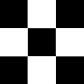

In [11]:
Image(filename="checkerboard_84x84.jpg")

In [12]:
image = cv2.imread("checkerboard_18x18.png")


In [13]:
image.shape

(18, 18, 3)

In [14]:
image.dtype

dtype('uint8')

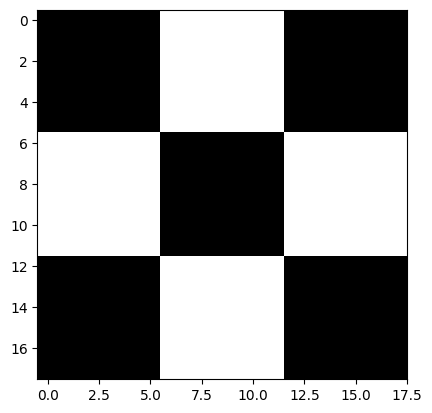

In [15]:
plt.imshow(image,cmap="gray")

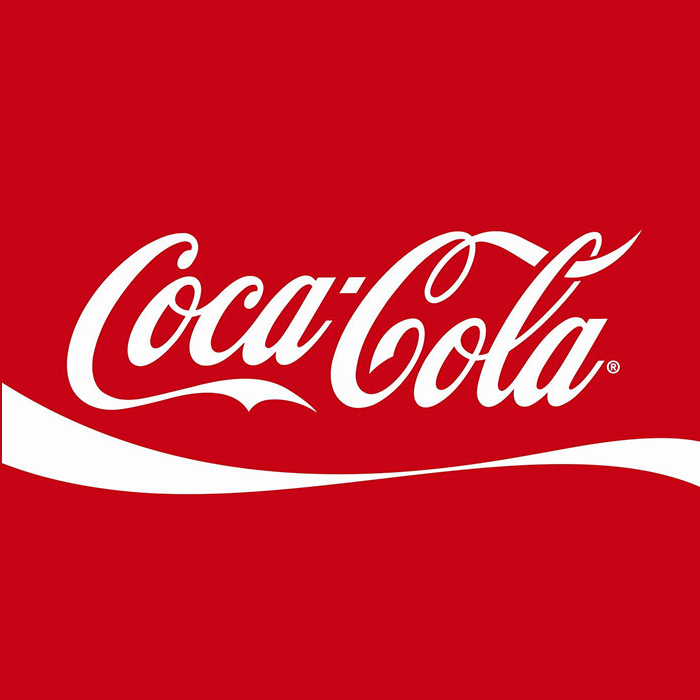

In [16]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

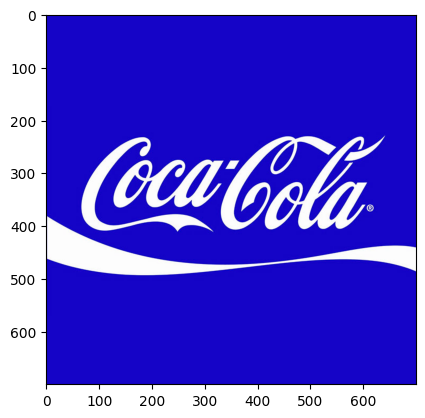

In [17]:
cococola = cv2.imread("coca-cola-logo.png")
plt.imshow(cococola)

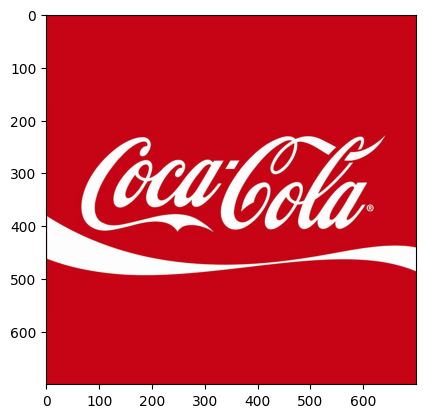

In [18]:
#By default cv2 reads image in bgr format we need to reverse the matrix to get right colors [:,:,::-1].
plt.imshow(cococola[:,:,::-1])


In [19]:
#Lets Split the image colors, Here there are three colors bgr, lets devide it using split command.
CocaCola = cv2.imread("coca-cola-logo.png")
CocaCola.shape

(700, 700, 3)

Text(0.5, 1.0, 'Merged')

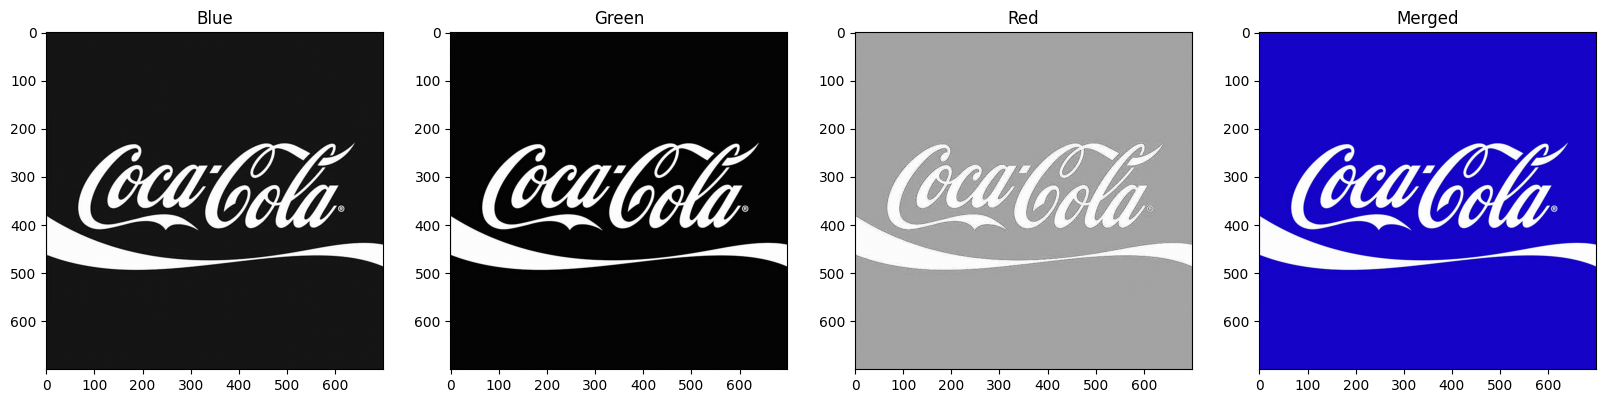

In [20]:
#So there are three Channels, which is b,g,r so lets split it
b,g,r = cv2.split(CocaCola)

plt.figure(figsize=[20,5])

#Lets See the each Channel
plt.subplot(141);plt.imshow(b,cmap="gray");plt.title("Blue");
plt.subplot(142);plt.imshow(g,cmap="gray");plt.title("Green");
plt.subplot(143);plt.imshow(r,cmap="gray");plt.title("Red");

#Merge these three to get the original image.
Colored_CocaCola =  cv2.merge((b,g,r))
plt.subplot(144);plt.imshow(Colored_CocaCola);plt.title("Merged") 

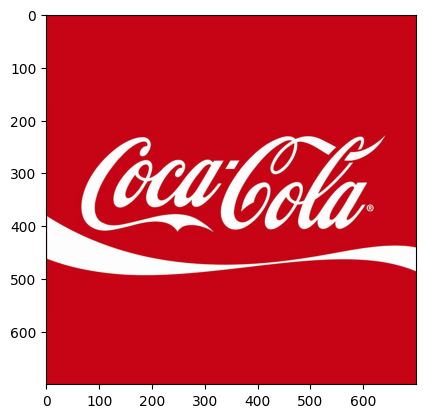

In [21]:
#There is a method used to convert one color format to other 
# Suchas BGR to RGB to HSV etcc.
# cv2.cvtColor()
#Example convert Colored_CocaCola into RGB Format.
 
rgb_cocacola =  cv2.cvtColor(Colored_CocaCola, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_cocacola)
#The above line converts BGR to RGB

In [22]:
#Now Convert this to HSV ColorSpace
hsv_cocacola = cv2.cvtColor(rgb_cocacola,cv2.COLOR_RGB2HSV)
#Now Converted to HSV Format
#Lets Just increase the Hue with 10
h,s,v = cv2.split(hsv_cocacola)

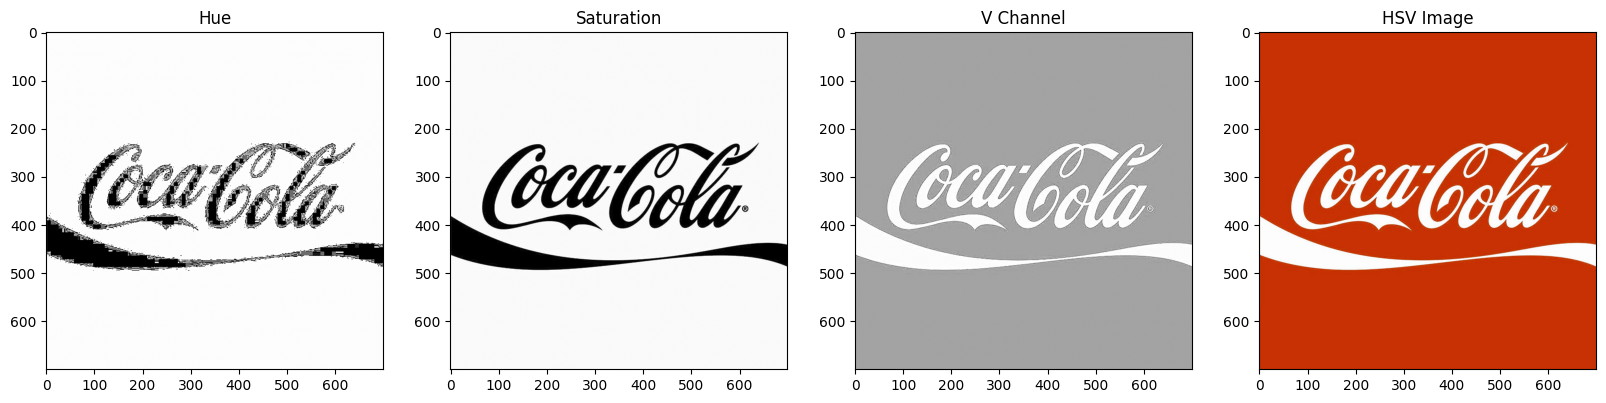

In [23]:
#Lets Plot All along with increased Hue Image.
h_new = h+10

plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("Hue");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("Saturation");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title('V Channel');

#Now merge all the channels and just print Hue increased image
hsv_merged_cocacola = cv2.merge((h_new,s,v))
rgb_merged_cocacole = cv2.cvtColor(hsv_merged_cocacola, cv2.COLOR_HSV2RGB)
plt.subplot(144);plt.imshow(rgb_merged_cocacole);plt.title("HSV Image");

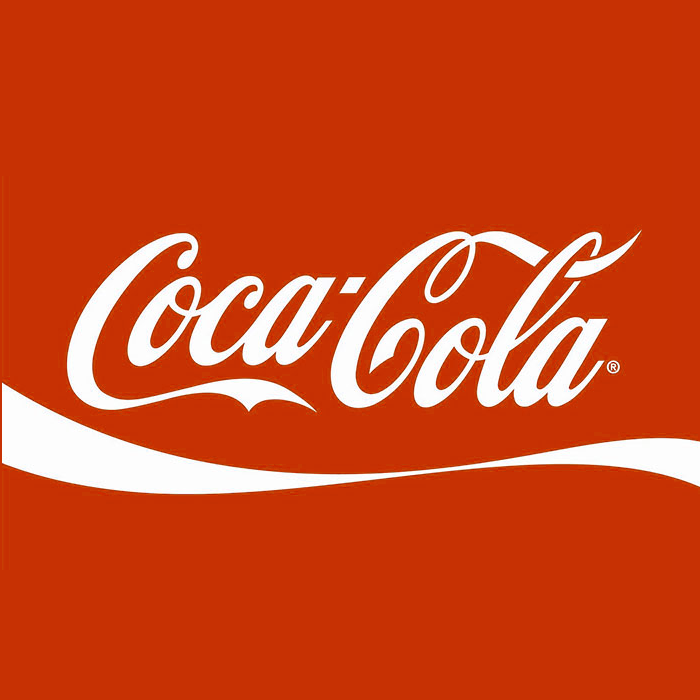

In [24]:
#now Save the Saturated Image, to local disk we can use cv2.imwrite() method
# Note: Before saving the image, must convert to bgr format
cv2.imwrite("CocaColaEnhancedImage.png",rgb_merged_cocacole[:,:,::-1])
Image("CocaColaEnhancedImage.png")

In [25]:
#Read the image as color.
img_as_clr = cv2.imread("CocaColaEnhancedImage.png", cv2.IMREAD_COLOR)
print(img_as_clr.shape)
#this gives output in 3d array

#Read the image as Grayscale
img_as_grayscale = cv2.imread("CocaColaEnhancedImage.png",cv2.IMREAD_GRAYSCALE)
print(img_as_grayscale.shape)
#this gives output in 2d Array

(700, 700, 3)
(700, 700)


In [26]:
namedShow = cv2.namedWindow("Image1")
cv2.imshow(namedShow,rgb_merged_cocacole)
cv2.waitKey(8000)
cv2.destroyWindow(namedShow)

error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window_QT.cpp:578: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvDestroyWindow'
